In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
datapath='/Users/soni6/github/soccer-analytics/data/archive/Datasets'
finalData=pd.read_csv(datapath+'/finalData.csv')

# finalData=finalData[finalData['FTR']!=0]
X=finalData.drop(columns=['FTR'])
# X=X.drop(columns=['HomeForm','AwayForm'])
y=finalData['FTR']
print(X.shape,finalData.columns)

#Define scaler (we're using the defaults here)
MMS = MinMaxScaler()
#Apply transformation 
X = MMS.fit_transform(X)

(6383, 41) Index(['FTR', 'FTHG-H', 'FTAG-H', 'FTR-H', 'HTHG-H', 'HTAG-H', 'HTR-H', 'HS-H',
       'AS-H', 'HST-H', 'AST-H', 'HC-H', 'AC-H', 'HF-H', 'AF-H', 'HY-H',
       'AY-H', 'HR-H', 'AR-H', 'FTHG-A', 'FTAG-A', 'FTR-A', 'HTHG-A', 'HTAG-A',
       'HTR-A', 'HS-A', 'AS-A', 'HST-A', 'AST-A', 'HC-A', 'AC-A', 'HF-A',
       'AF-A', 'HY-A', 'AY-A', 'HR-A', 'AR-A', 'HomeForm', 'AwayForm',
       'PreviousEncounters', 'HomePreviousPosition', 'AwayPreviousPosition'],
      dtype='object')


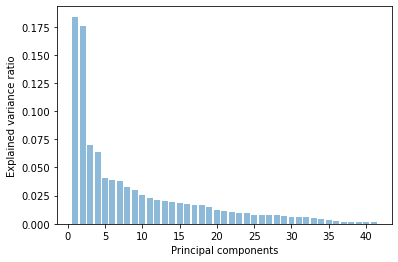

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
plt.bar(range(1, 42), pca.explained_variance_ratio_, alpha=0.5, align='center')
# plt.step(range(1, 110), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## KNN

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

#Define and fit model
#Choose some parameters to search over
params = {
    'estimator__n_neighbors': [20,50,200,500],
    "estimator__weights": ['distance'],
    "estimator__p":[1,2]
}
model_to_set = OneVsRestClassifier(KNeighborsRegressor())
model = GridSearchCV(model_to_set, params, cv=3, scoring='accuracy', return_train_score=True)
t1=time.time()
model.fit(X_train,y_train)

#Print out some results
print("The best model is:",model.best_params_)
print("\nThe accuracy of the best model is:", model.best_score_)
t2=time.time()
print("Time to train", round(t2-t1,2))

y_preds = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
# auc_roc = auc(fpr, tpr)
print("Testing set accuracy",accuracy)

The best model is: {'estimator__n_neighbors': 200, 'estimator__p': 1, 'estimator__weights': 'distance'}

The accuracy of the best model is: 0.5136520914746922
Time to train 53.89
Testing set accuracy 0.5488250652741514


## SVM

In [18]:

# pca = PCA(n_components = 30)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.fit_transform(X_test)
# # comment below if without PCA
# X_train=X_train_pca
# X_test=X_test_pca



In [59]:
# with grid search 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
model_to_set = OneVsRestClassifier(SVC(gamma='scale'))
parameters = {
    "estimator__C": [0.1,1,10],
    "estimator__kernel": ["linear","poly","rbf"],
}
t1=time.time()
clfSV = GridSearchCV(model_to_set,cv=3,scoring='accuracy', param_grid=parameters)

clfSV.fit(X_train,y_train)

#Print out some results
print("The best model is:",clfSV.best_params_)
print("\nThe accuracy of the best model is:", clfSV.best_score_)
t2=time.time()
print("Time to train", round(t2-t1,2))


y_preds = clfSV.predict(X_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
# auc_roc = auc(fpr, tpr)
accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
print("Testing set accuracy",accuracy)

clfSV.cv_results_

The best model is: {'estimator__C': 10, 'estimator__kernel': 'linear'}

The accuracy of the best model is: 0.5584173574144772
Time to train 66.02
Testing set accuracy 0.5827676240208878


{'mean_fit_time': array([0.63016105, 1.04964566, 1.09574413, 0.61712869, 1.95791173,
        1.03168575, 0.99849391, 9.94800019, 1.43591865]),
 'std_fit_time': array([0.01095731, 0.03981758, 0.10359627, 0.01127321, 0.02593453,
        0.02594046, 0.0284702 , 0.30826929, 0.03180793]),
 'mean_score_time': array([0.22949894, 0.24487638, 0.37187592, 0.20828859, 0.24626152,
        0.35153937, 0.226379  , 0.23217106, 0.36224   ]),
 'std_score_time': array([0.00934442, 0.00690938, 0.01400829, 0.00419309, 0.00743162,
        0.00099986, 0.00457163, 0.00722127, 0.00696231]),
 'param_estimator__C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_estimator__kernel': masked_array(data=['linear', 'poly', 'rbf', 'linear', 'poly', 'rbf',
                    'linear', 'poly', 'rbf'],
              mask=[False, False, False, False, 

## Neural network

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

o=np.ones(X.shape[0])
o=o.reshape(X.shape[0],1)
# X=np.hstack((X,o))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

encoder = LabelEncoder()

# training
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
# testing
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_y_test)



In [54]:
# Neural network

model = Sequential()
model.add(Dense(5, input_dim=41, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.compile(loss='categorical_hinge', optimizer='adam', metrics=['accuracy']) # categorical_crossentropy or categorical_hinge or squared_hinge 
history = model.fit(X_train, dummy_y_train, epochs=100)
y_pred = model.predict(X_test)

# categorigal hinge
# with bias: shuffle False:20*2, relu hinge loss: 54.8
# shuffle False:20*2, relu hinge loss: 55.3
# 20*2: relu, sm,sm: 56.4
# 20*2: sm,sm,sm
# shuffle False:10*3, relu hinge loss: 54.8
# shuffle False:10*5, relu hinge loss: 55.6
# shuffle False:20*5, relu hinge loss: 57.7
# shuffle False:40*5, relu hinge loss: 27
# shuffle False:20*3, relu hinge loss: 27.2
# shuffle False:20*8, relu hinge loss: 28

# squared hinge: 30% inmost cases



Epoch 1/100
4468/4468 [==============================] - 1s 244us/step - loss: 0.9689 - accuracy: 0.4738
Epoch 2/100
4468/4468 [==============================] - 0s 65us/step - loss: 0.9192 - accuracy: 0.5065
Epoch 3/100
4468/4468 [==============================] - 0s 62us/step - loss: 0.9109 - accuracy: 0.4969
Epoch 4/100
4468/4468 [==============================] - 0s 66us/step - loss: 0.8966 - accuracy: 0.5143
Epoch 5/100
4468/4468 [==============================] - 0s 63us/step - loss: 0.8864 - accuracy: 0.5137
Epoch 6/100
4468/4468 [==============================] - 0s 66us/step - loss: 0.8749 - accuracy: 0.5029
Epoch 7/100
4468/4468 [==============================] - 0s 69us/step - loss: 0.8674 - accuracy: 0.5121
Epoch 8/100
4468/4468 [==============================] - 0s 65us/step - loss: 0.8612 - accuracy: 0.5090
Epoch 9/100
4468/4468 [==============================] - 0s 70us/step - loss: 0.8594 - accuracy: 0.5083
Epoch 10/100
4468/4468 [==============================] - 0s 72

In [55]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(dummy_y_test)):
    test.append(np.argmax(dummy_y_test[i]))
    
a = sklearn.metrics.accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 56.39686684073107


## Random Forest


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=1) # Stumps only, feature bagging with sqrt(# features), bootstrap samples
rf_clf = GridSearchCV(rf, {'n_estimators':[3,6,9,12,15,18]})
rf_clf.fit(X_train, y_train)

# Best number of trees
print(rf_clf.best_params_)

# Test/train set AUC
y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf = rf_clf.predict(X_test)

{'n_estimators': 6}


In [62]:
rf_train_score = sklearn.metrics.accuracy_score(y_train, y_train_pred_rf)
rf_test_score = sklearn.metrics.accuracy_score(y_test, y_test_pred_rf)
print(rf_train_score, rf_test_score)

0.5161145926589078 0.5509138381201044


In [63]:

rf = RandomForestClassifier(max_depth=1, n_estimators=1000) # Stumps only, feature bagging with sqrt(# features), bootstrap samples
rf.fit(X,y)

feat_imp = rf.feature_importances_
for j in range(len(feat_imp)):
    print('Atr{}'.format(j+1), feat_imp[j])

# Print runtime
feat_imp.argsort()


Atr1 0.028
Atr2 0.001
Atr3 0.005
Atr4 0.003
Atr5 0.0
Atr6 0.01
Atr7 0.067
Atr8 0.038
Atr9 0.031
Atr10 0.004
Atr11 0.0
Atr12 0.001
Atr13 0.0
Atr14 0.0
Atr15 0.0
Atr16 0.0
Atr17 0.0
Atr18 0.0
Atr19 0.003
Atr20 0.023
Atr21 0.041
Atr22 0.0
Atr23 0.001
Atr24 0.003
Atr25 0.039
Atr26 0.063
Atr27 0.03
Atr28 0.027
Atr29 0.012
Atr30 0.001
Atr31 0.0
Atr32 0.0
Atr33 0.002
Atr34 0.0
Atr35 0.0
Atr36 0.0
Atr37 0.073
Atr38 0.091
Atr39 0.153
Atr40 0.141
Atr41 0.109


array([16, 15, 14, 13, 12, 10, 34, 31, 21, 35, 33,  4, 30, 17, 11, 29,  1,
       22, 32, 23,  3, 18,  9,  2,  5, 28, 19, 27,  0, 26,  8,  7, 24, 20,
       25,  6, 36, 37, 40, 39, 38])

## Use top 10 features from random forest

In [58]:
f=[7, 24, 20, 6, 25, 36, 37, 39, 40, 38]
X_f=X[:,f]

### KNN

In [31]:
#Define and fit model
#Choose some parameters to search over
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.3, shuffle=False, random_state=0)
params = {
    'estimator__n_neighbors': [50,200,500],
    "estimator__weights": ['distance'],
    "estimator__p":[1]
}
model_to_set = OneVsRestClassifier(KNeighborsRegressor())
model = GridSearchCV(model_to_set, params, cv=3, scoring='accuracy', return_train_score=True)
t1=time.time()
model.fit(X_train,y_train)

#Print out some results
print("The best model is:",model.best_params_)
print("\nThe accuracy of the best model is:", model.best_score_)
t2=time.time()
print("Time to train", round(t2-t1,2))

y_preds = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
# auc_roc = auc(fpr, tpr)
print("Testing set accuracy",accuracy)

The best model is: {'estimator__n_neighbors': 200, 'estimator__p': 1, 'estimator__weights': 'distance'}

The accuracy of the best model is: 0.5358072546925027
Time to train 10.09
Testing set accuracy 0.5634464751958225


### SVM

In [4]:
# with grid search 
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.3, shuffle=False, random_state=0)
model_to_set = OneVsRestClassifier(SVC(gamma='scale'))
parameters = {
    "estimator__C": [0.1,1,10],
    "estimator__kernel": ["linear","poly","rbf"],
}
t1=time.time()
clfSV = GridSearchCV(model_to_set,cv=3,scoring='accuracy', param_grid=parameters)

clfSV.fit(X_train,y_train)

#Print out some results
print("The best model is:",clfSV.best_params_)
print("\nThe accuracy of the best model is:", clfSV.best_score_)
t2=time.time()
print("Time to train", round(t2-t1,2))


y_preds = clfSV.predict(X_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
# auc_roc = auc(fpr, tpr)
accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
print("Testing set accuracy",accuracy)

The best model is: {'estimator__C': 10, 'estimator__kernel': 'linear'}

The accuracy of the best model is: 0.5595347236933635
Time to train 903.38
Testing set accuracy 0.587467362924282


### NN

In [76]:

X_f=X[:,f]
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

o=np.ones(X.shape[0])
o=o.reshape(X.shape[0],1)

# X=np.hstack((X,o))
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.3, shuffle=False, random_state=0)

encoder = LabelEncoder()

# training
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
# testing
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

# Neural network

model = Sequential()
model.add(Dense(5, input_dim=10, activation='relu'))
num_layers=5
for i in range(max(0,num_layers-1)):
    model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.compile(loss='categorical_hinge', optimizer='adam', metrics=['accuracy']) # categorical_crossentropy or categorical_hinge or squared_hinge 
history = model.fit(X_train, dummy_y_train, epochs=100)
y_pred = model.predict(X_test)

## 2*5: 57.6
## 5*5: 58.3

Epoch 1/100
4468/4468 [==============================] - 1s 324us/step - loss: 0.9935 - accuracy: 0.4830
Epoch 2/100
4468/4468 [==============================] - 0s 81us/step - loss: 0.9729 - accuracy: 0.4870
Epoch 3/100
4468/4468 [==============================] - 0s 78us/step - loss: 0.9367 - accuracy: 0.5128
Epoch 4/100
4468/4468 [==============================] - 0s 79us/step - loss: 0.9238 - accuracy: 0.5217
Epoch 5/100
4468/4468 [==============================] - 0s 76us/step - loss: 0.9172 - accuracy: 0.5215
Epoch 6/100
4468/4468 [==============================] - 0s 79us/step - loss: 0.9114 - accuracy: 0.5222
Epoch 7/100
4468/4468 [==============================] - 0s 79us/step - loss: 0.9088 - accuracy: 0.5237
Epoch 8/100
4468/4468 [==============================] - 0s 79us/step - loss: 0.9023 - accuracy: 0.5239
Epoch 9/100
4468/4468 [==============================] - 0s 82us/step - loss: 0.8963 - accuracy: 0.5233
Epoch 10/100
4468/4468 [==============================] - 0s 84

In [78]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(dummy_y_test)):
    test.append(np.argmax(dummy_y_test[i]))
    
a = sklearn.metrics.accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 58.38120104438642


In [77]:
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True

Accuracy is: 58.38120104438642


# PCA

In [19]:
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
# comment below if without PCA
X_train=X_train_pca
X_test=X_test_pca

#### SVM

In [20]:
# with grid search 
model_to_set = OneVsRestClassifier(SVC(gamma='scale'))
parameters = {
    "estimator__C": [0.1,1,10],
    "estimator__kernel": ["linear"],
}
t1=time.time()
clfSV = GridSearchCV(model_to_set,cv=3,scoring='accuracy', param_grid=parameters)

clfSV.fit(X_train,y_train)

#Print out some results
print("The best model is:",clfSV.best_params_)
print("\nThe accuracy of the best model is:", clfSV.best_score_)
t2=time.time()
print("Time to train", round(t2-t1,2))


y_preds = clfSV.predict(X_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
# auc_roc = auc(fpr, tpr)
accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
print("Testing set accuracy",accuracy)

The best model is: {'estimator__C': 1, 'estimator__kernel': 'linear'}

The accuracy of the best model is: 0.4986554644574756
Time to train 5.18
Testing set accuracy 0.5075718015665797


#### NN


In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

o=np.ones(X.shape[0])
o=o.reshape(X.shape[0],1)

# X=np.hstack((X,o))
# X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.3, shuffle=False)

encoder = LabelEncoder()

# training
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
# testing
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

# Neural network

model = Sequential()
model.add(Dense(5, input_dim=20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.compile(loss='categorical_hinge', optimizer='adam', metrics=['accuracy']) # categorical_crossentropy or categorical_hinge or squared_hinge 
history = model.fit(X_train, dummy_y_train, epochs=100)
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(dummy_y_test)):
    test.append(np.argmax(dummy_y_test[i]))
    
a = sklearn.metrics.accuracy_score(pred,test)
print('Accuracy is:', a*100)

Epoch 1/100
4468/4468 [==============================] - 1s 168us/step - loss: 1.0007 - accuracy: 0.2811
Epoch 2/100
4468/4468 [==============================] - 0s 42us/step - loss: 1.0000 - accuracy: 0.2849
Epoch 3/100
4468/4468 [==============================] - 0s 44us/step - loss: 1.0000 - accuracy: 0.2847
Epoch 4/100
4468/4468 [==============================] - 0s 44us/step - loss: 1.0000 - accuracy: 0.2851
Epoch 5/100
4468/4468 [==============================] - 0s 43us/step - loss: 1.0000 - accuracy: 0.2851
Epoch 6/100
4468/4468 [==============================] - 0s 43us/step - loss: 1.0000 - accuracy: 0.2851
Epoch 7/100
4468/4468 [==============================] - 0s 46us/step - loss: 1.0000 - accuracy: 0.2854
Epoch 8/100
4468/4468 [==============================] - 0s 43us/step - loss: 1.0000 - accuracy: 0.2856
Epoch 9/100
4468/4468 [==============================] - 0s 40us/step - loss: 1.0000 - accuracy: 0.2863
Epoch 10/100
4468/4468 [==============================] - 0s 43

#### KNN

In [27]:
#Define and fit model
#Choose some parameters to search over
params = {
    'estimator__n_neighbors': [20,50,200,500],
    "estimator__weights": ['distance'],
    "estimator__p":[1,2]
}
model_to_set = OneVsRestClassifier(KNeighborsRegressor())
model = GridSearchCV(model_to_set, params, cv=3, scoring='accuracy', return_train_score=True)
t1=time.time()
model.fit(X_train,y_train)

#Print out some results
print("The best model is:",model.best_params_)
print("\nThe accuracy of the best model is:", model.best_score_)
t2=time.time()
print("Time to train", round(t2-t1,2))

y_preds = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
# auc_roc = auc(fpr, tpr)
print("Testing set accuracy",accuracy)

The best model is: {'estimator__n_neighbors': 200, 'estimator__p': 2, 'estimator__weights': 'distance'}

The accuracy of the best model is: 0.5055944938497527
Time to train 31.75
Testing set accuracy 0.5143603133159269


In [85]:
# print top 10 features in RF
f=[7, 24, 20, 6, 25, 36, 37, 39, 40, 38]
pd_features = finalData.drop(columns=['FTR'])
pd_features.columns[f]

Index(['AS-H', 'HS-A', 'FTR-A', 'HS-H', 'AS-A', 'HomeForm', 'AwayForm',
       'HomePreviousPosition', 'AwayPreviousPosition', 'PreviousEncounters'],
      dtype='object')